In [194]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [195]:
import os
os.chdir("/content/drive/MyDrive/MenonLabs/ytKaggle")
!ls

CA_category_id.json  GBvideos.csv	  MX_category_id.json
CAvideos.csv	     IN_category_id.json  MXvideos.csv
DE_category_id.json  INvideos.csv	  RU_category_id.json
DEvideos.csv	     JP_category_id.json  RUvideos.csv
FR_category_id.json  JPvideos.csv	  US_category_id.json
FRvideos.csv	     KR_category_id.json  USvideos.csv
GB_category_id.json  KRvideos.csv


In [196]:
df = pd.read_csv("USvideos.csv")
df.dtypes
#df.head(10)

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [197]:
df.isnull().sum()
df.fillna("",inplace=True)
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [198]:
df['title_length']  = df['title'].str.len()
df['channel_title_length']  = df['channel_title'].str.len()
df['description_length']  = df['description'].str.len()
#df['tags_count'] = df['tags'].value_counts()
df['tags_count'] = df['tags'].str.split().str.len()

df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,channel_title_length,description_length,tags_count
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,34,12,1410,2
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",62,15,630,12
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,53,12,1177,19
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,32,21,1403,34
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,8,636,4


In [199]:
# print(df['video_id'].value_counts())
# print(df["tags"][:10].str.split().str.len())


In [200]:
df["comments_disabled"]=df["comments_disabled"].replace(to_replace=False, value=-1)
df["comments_disabled"]=df["comments_disabled"].replace(to_replace=True, value=1)
df["ratings_disabled"]=df["ratings_disabled"].replace(to_replace=False, value=-1)
df["ratings_disabled"]=df["ratings_disabled"].replace(to_replace=True, value=1)
df["video_error_or_removed"]=df["video_error_or_removed"].replace(to_replace=False, value=-1)
df["video_error_or_removed"]=df["video_error_or_removed"].replace(to_replace=True, value=1)
df.head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,channel_title_length,description_length,tags_count
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,-1.0,-1.0,-1.0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,34,12,1410,2
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,-1.0,-1.0,-1.0,"One year after the presidential election, John...",62,15,630,12
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,-1.0,-1.0,-1.0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,53,12,1177,19
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,-1.0,-1.0,-1.0,Today we find out if Link is a Nickelback amat...,32,21,1403,34
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,-1.0,-1.0,-1.0,I know it's been a while since we did this sho...,24,8,636,4
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,-1.0,-1.0,-1.0,Using the iPhone for the past two weeks -- her...,21,8,1511,9
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,-1.0,-1.0,-1.0,Embattled Alabama Senate candidate Roy Moore (...,41,19,503,33
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,-1.0,-1.0,-1.0,Ice Cream Pint Combination Lock - http://amzn....,35,18,734,24
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,-1.0,-1.0,-1.0,"Inspired by the imagination of P.T. Barnum, Th...",65,16,1310,37
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,-1.0,-1.0,-1.0,"For now, at least, we have better things to wo...",53,3,2257,13


category_id              -0.173921
views                     0.849177
likes                     1.000000
dislikes                  0.447186
comment_count             0.803057
comments_disabled        -0.028918
ratings_disabled         -0.020888
video_error_or_removed   -0.002641
title_length             -0.078166
channel_title_length     -0.001546
description_length       -0.013887
tags_count               -0.031813
Name: likes, dtype: float64


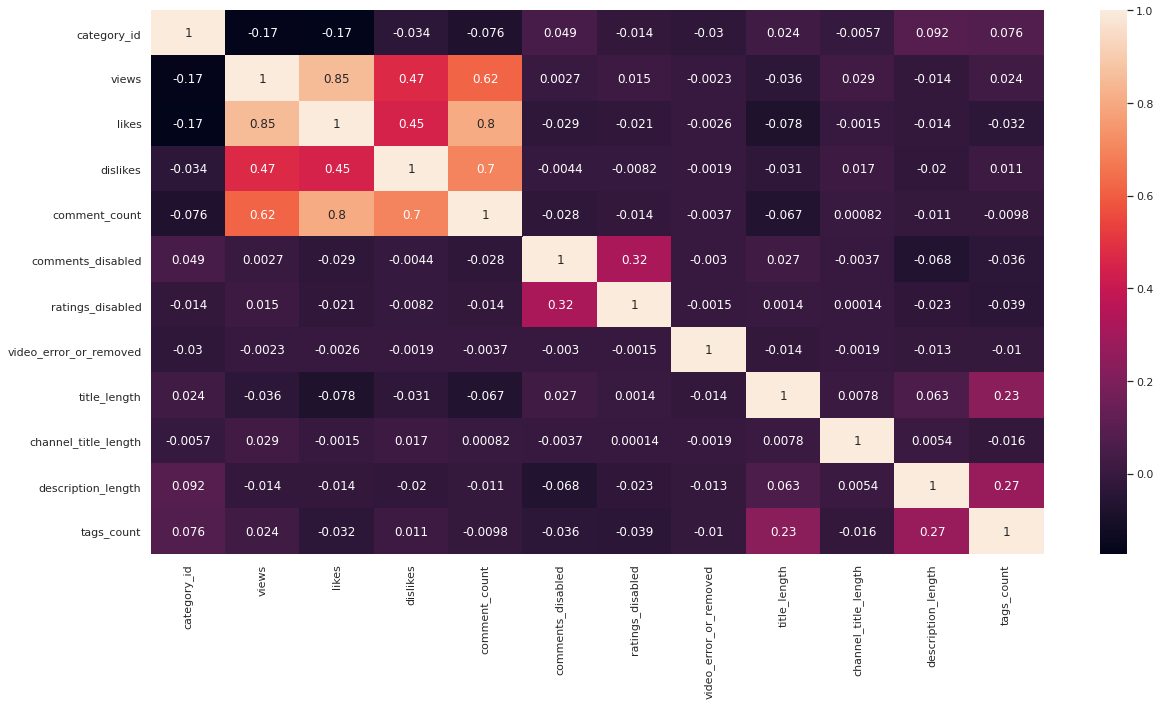

In [201]:
corrData= df.corr().loc["likes", :]
#sns.set(font_scale=1.5)
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
print(corrData)

In [202]:
df["publish_time"]=pd.to_datetime(df["publish_time"]).dt.tz_localize(None)
#import datetime
#format_str = '%y.%d.%m' # The format
#df["trending_date"]=pd.to_datetime(df["trending_date"],format_str)



tempDate= df["trending_date"].str.split(".", expand= True)

df["yy"]= tempDate[0]

df["mm"]= tempDate[2]
df["dd"]= tempDate[1]
del tempDate
tempDate= df["dd"]+ "/"+df["mm"] + "/" +df["yy"]
#tempDate.head()
df["trending_date"]=pd.to_datetime(tempDate)




video_id                           object
trending_date              datetime64[ns]
title                              object
channel_title                      object
category_id                         int64
publish_time               datetime64[ns]
tags                               object
views                               int64
likes                               int64
dislikes                            int64
comment_count                       int64
thumbnail_link                     object
comments_disabled                 float64
ratings_disabled                  float64
video_error_or_removed            float64
description                        object
title_length                        int64
channel_title_length                int64
description_length                  int64
tags_count                          int64
yy                                 object
mm                                 object
dd                                 object
Days_to_trend             timedelt

In [216]:
df= df.drop(['yy', 'mm', 'dd'], axis = 1)
df["Days_to_trend"]= (df["trending_date"]- df["publish_time"]).dt.days
#df["Days_to_trend"]= df["Days_to_trend"]
df['day_of_week'] = df['publish_time'].dt.day_name()
df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,channel_title_length,description_length,tags_count,Days_to_trend,day_of_week
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,-1.0,-1.0,-1.0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,34,12,1410,2,0,Monday
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,-1.0,-1.0,-1.0,"One year after the presidential election, John...",62,15,630,12,0,Monday
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,-1.0,-1.0,-1.0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,53,12,1177,19,1,Sunday
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,-1.0,-1.0,-1.0,Today we find out if Link is a Nickelback amat...,32,21,1403,34,0,Monday
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,-1.0,-1.0,-1.0,I know it's been a while since we did this sho...,24,8,636,4,1,Sunday
5,gHZ1Qz0KiKM,2017-11-14,2 Weeks with iPhone X,iJustine,28,2017-11-13 19:07:23,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,-1.0,-1.0,-1.0,Using the iPhone for the past two weeks -- her...,21,8,1511,9,0,Monday
6,39idVpFF7NQ,2017-11-14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12 05:37:17,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,-1.0,-1.0,-1.0,Embattled Alabama Senate candidate Roy Moore (...,41,19,503,33,1,Sunday
7,nc99ccSXST0,2017-11-14,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12 21:50:37,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,-1.0,-1.0,-1.0,Ice Cream Pint Combination Lock - http://amzn....,35,18,734,24,1,Sunday
8,jr9QtXwC9vc,2017-11-14,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13 14:00:23,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,-1.0,-1.0,-1.0,"Inspired by the imagination of P.T. Barnum, Th...",65,16,1310,37,0,Monday
9,TUmyygCMMGA,2017-11-14,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13 13:45:16,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,-1.0,-1.0,-1.0,"For now, at least, we have better things to wo...",53,3,2257,13,0,Monday


category_id              -0.173921
views                     0.849177
likes                     1.000000
dislikes                  0.447186
comment_count             0.803057
comments_disabled        -0.028918
ratings_disabled         -0.020888
video_error_or_removed   -0.002641
title_length             -0.078166
channel_title_length     -0.001546
description_length       -0.013887
tags_count               -0.031813
Name: likes, dtype: float64


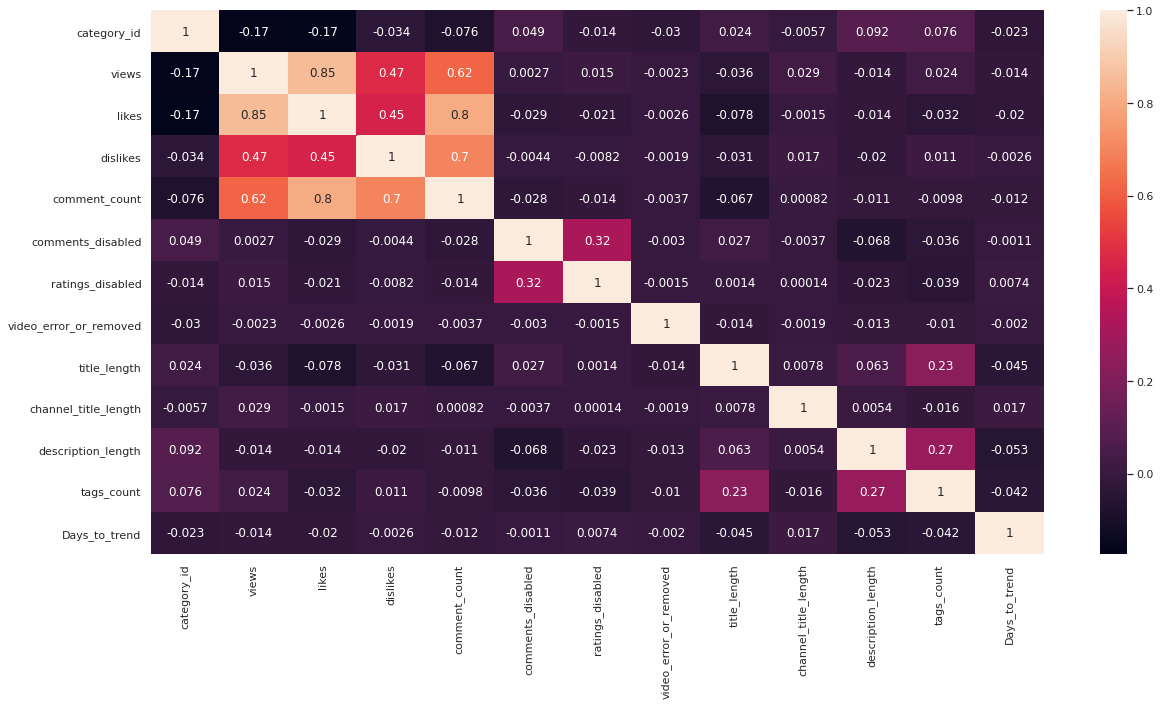

In [218]:
# df.corr().loc["likes", :]
# plt.figure(figsize=(20,10))
# sns.heatmap(df.corr(), annot=True)
# print(corrData)

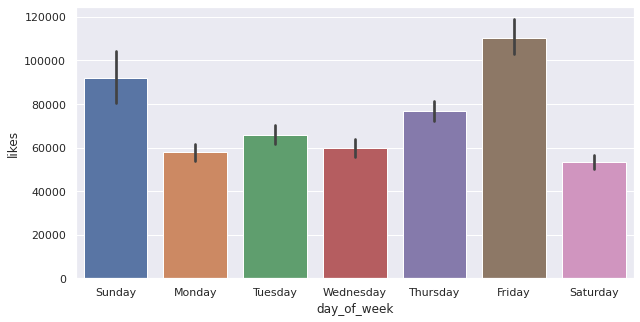

In [237]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["day_of_week"],data=df)

sns.barplot(x=df["day_of_week"],y=df["likes"], order= ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

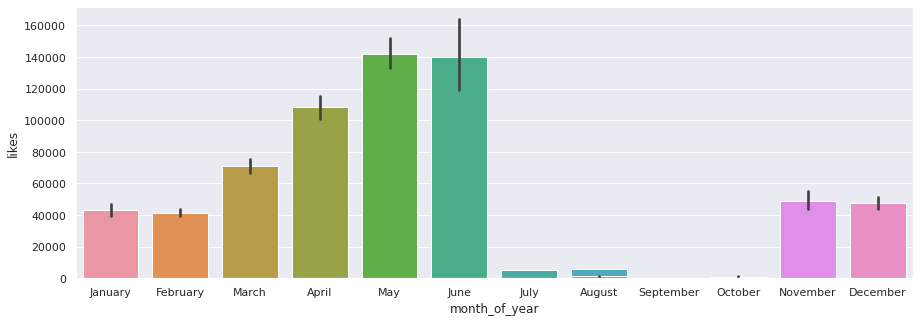

In [232]:
df['month_of_year'] = df['publish_time'].dt.month_name()
plt.figure(figsize=(15,5))
sns.countplot(x=df["month_of_year"],data=df)

sns.barplot(x=df["month_of_year"],y=df["likes"], order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'Auguvst', 'September', 'October', 'November', 'December'])

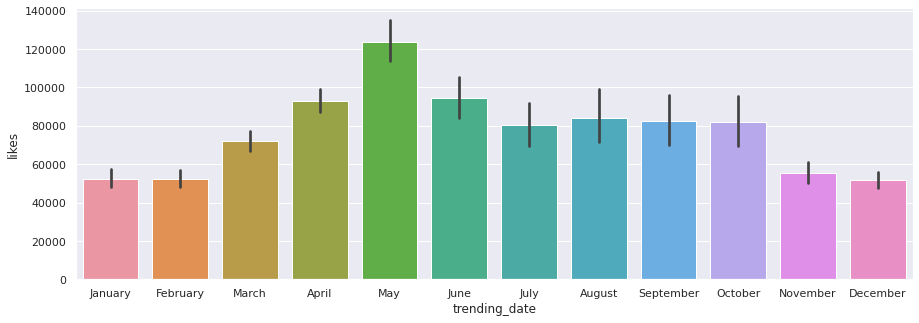

In [238]:
#df['trending_date'] = df['trending_date'].dt.month_name()
plt.figure(figsize=(15,5))
sns.countplot(x=df["trending_date"],data=df)

sns.barplot(x=df["trending_date"],y=df["likes"], order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])